In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
x, y = make_blobs(n_samples=1000,n_features=2,centers=3)

In [3]:
x

array([[ 0.83961399, -2.28650896],
       [10.31502927, -2.70285367],
       [ 8.16166704, -2.32593521],
       ...,
       [ 8.6826126 ,  4.23529841],
       [ 2.47833927, -3.47612793],
       [10.03365102,  2.88167996]], shape=(1000, 2))

In [4]:
y

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1,
       2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1,
       1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0,
       2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2,
       1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1,

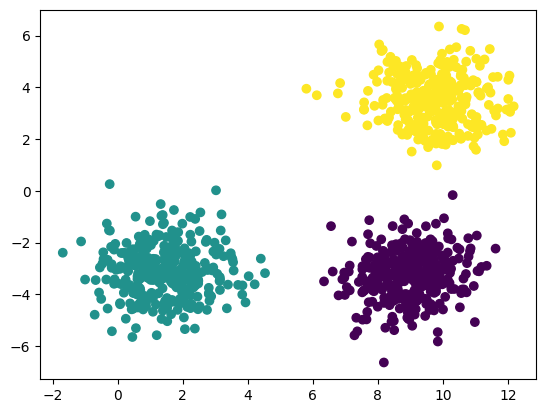

In [6]:
plt.scatter(x[:,0],x[:,1],c=y)

In [7]:
## Standardization --- feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [10]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
### Elbow method to select the K Value

In [13]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[1340.0000000000005,
 515.2938976169322,
 101.6599151418413,
 89.8863405445935,
 77.05142107883485,
 67.49558950357198,
 58.348563209896255,
 50.781356189767855,
 45.40364248046262,
 41.399441455384505]

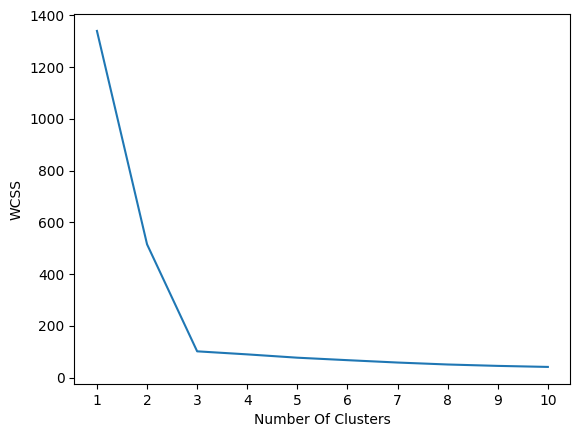

In [15]:
## plot elbow curve 
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(x_train_scaled)

array([2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2,
       1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1,
       1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2,
       0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2,
       1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1,
       1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0,
       1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2,

In [17]:
y_pred = kmeans.predict(x_test_scaled)

In [18]:
y_pred

array([0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0,
       2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1,
       0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1,

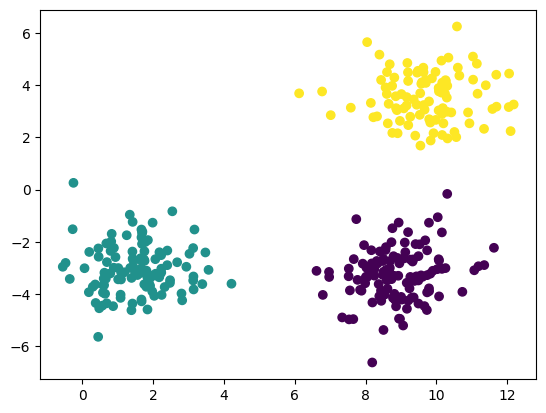

In [20]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [22]:
## validating the k- values
## 1. kneelocater
## 2. Slihoute SCoring

In [24]:
## 1. Kneelocater
!pip install kneed

In [25]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [28]:
print(k1.elbow)

3


In [29]:
## 2. silhoute scoring
from sklearn.metrics import silhouette_score

In [36]:
silhoute_coefficients = []

for k in range(2,11):
    k_means = KMeans(n_clusters=k,init="k-means++")
    k_means.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled,k_means.labels_)
    silhoute_coefficients.append(score)

In [37]:
silhoute_coefficients

[np.float64(0.5962001286222807),
 np.float64(0.7470105750190363),
 np.float64(0.600269040500573),
 np.float64(0.6083348486921081),
 np.float64(0.46291786403843244),
 np.float64(0.3342527449808735),
 np.float64(0.3576136814588597),
 np.float64(0.34869766580190764),
 np.float64(0.35254182975624004)]

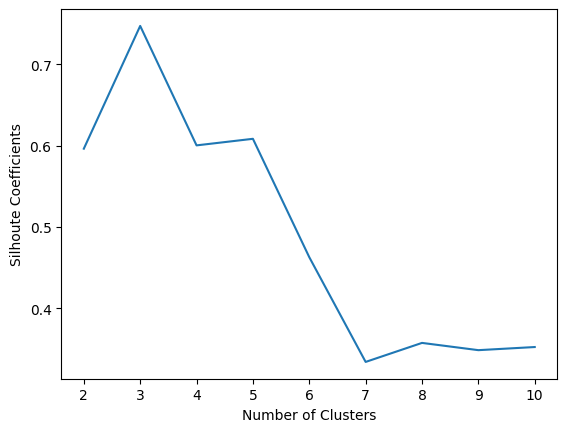

In [39]:
plt.plot(range(2,11),silhoute_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoute Coefficients")
plt.show()